# MONTE CARLO SIMULATIONS FOR STOCK ANALYSIS

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import yfinance as yf

In [41]:
ticker = 'JPM'
data = pd.DataFrame()

data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2010-1-1')['Adj Close']

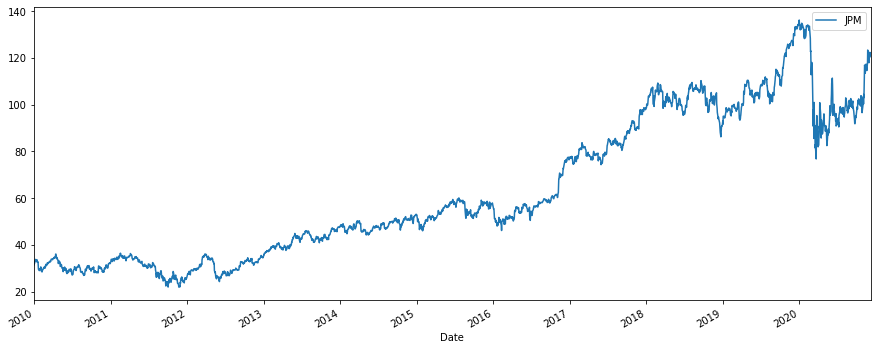

In [42]:
# Plotting the dataset

data.plot(figsize=[15,6])

Text(0, 0.5, 'Frequency')

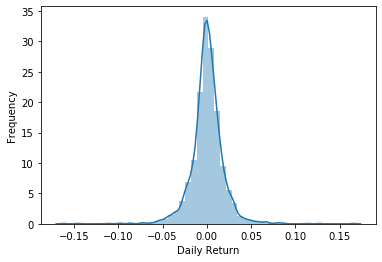

In [43]:
# Computing the logarithmic returns

data_log_return  = np.log(1 + data.pct_change())
sns.distplot(data_log_return.iloc[1:])
plt.xlabel('Daily Return')
plt.ylabel('Frequency')

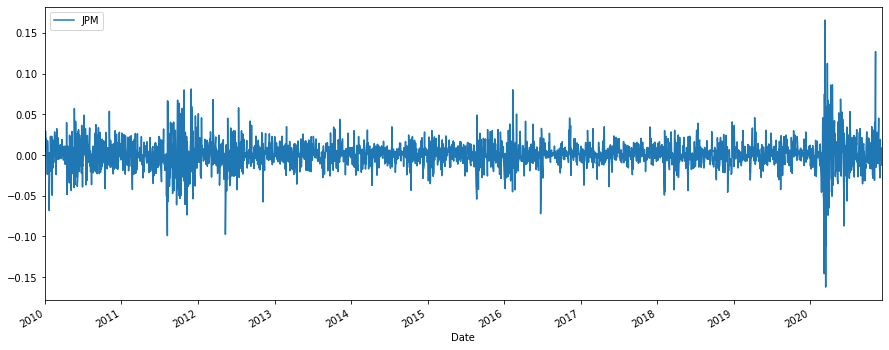

In [44]:
data_log_return.plot(figsize=[15,6])

In [45]:
# Computing the drift

mean = data_log_return.mean()
var = data_log_return.var()

drift = mean - (0.5 * var)

stddev = data_log_return.std()

x = np.random.rand(10,2)


Z = norm.ppf(np.random.rand(10,2))

t_intervals = 1000
iterations = 10

In [46]:
S0 = data.iloc[-1]
S0

JPM    120.489998
Name: 2020-12-09 00:00:00, dtype: float64

In [34]:
daily_returns = np.exp(drift.values + stddev.values * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[1.00843725, 0.99579291, 0.9896386 , ..., 0.97881587, 0.9840627 ,
        1.04683126],
       [0.9572657 , 1.0052134 , 1.01590382, ..., 0.99187454, 1.01400741,
        1.00757881],
       [0.9884406 , 1.02774801, 1.02168944, ..., 0.99779247, 1.04103851,
        1.00562065],
       ...,
       [0.98463369, 1.00064786, 1.03565573, ..., 1.01056847, 1.0141977 ,
        0.97660948],
       [0.9985248 , 0.97807809, 1.00629534, ..., 1.01076374, 0.97927454,
        1.00565089],
       [0.99200725, 0.94954899, 1.01845433, ..., 0.97145013, 1.00998147,
        1.01327417]])

In [48]:
price_list = np.zeros_like(daily_returns)
price_list.shape

price_list[0] = S0

In [52]:
for t in range(1,t_intervals):
    price_list[t] = price_list[t-1]*daily_returns[t]


In [53]:
price_list

array([[120.48999786, 120.48999786, 120.48999786, ..., 120.48999786,
        120.48999786, 120.48999786],
       [115.34094195, 121.11816092, 122.40624947, ..., 119.51096081,
        122.17775101, 121.40316844],
       [114.00767029, 124.4789483 , 125.06117244, ..., 119.24713675,
        127.19174359, 122.08553284],
       ...,
       [ 50.34534027, 244.92289157, 158.30193343, ..., 153.51947704,
        374.96759083, 303.63003593],
       [ 50.2710707 , 239.55371342, 159.29849718, ..., 155.17192126,
        367.19621672, 305.34581609],
       [ 49.86926664, 227.46798611, 162.23824461, ..., 150.74178275,
        370.86137403, 309.39902884]])

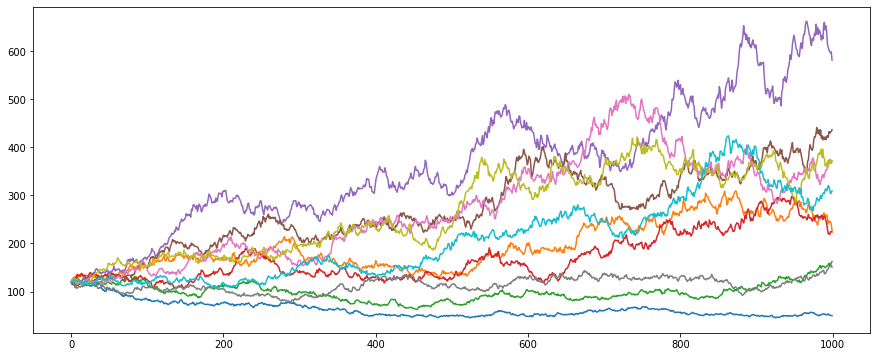

In [54]:
# Plotting the results
plt.figure(figsize=(15,6))
plt.plot(price_list)

Text(0.5, 0, 'Price after 50 days')

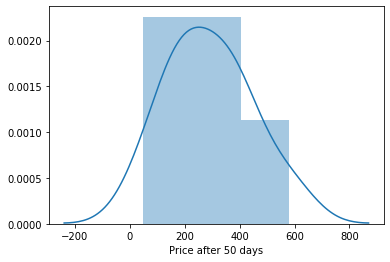

In [55]:
# Distribution for 50 days prediction

sns.distplot(pd.DataFrame(price_list).iloc[-1])
plt.xlabel("Price after 50 days")

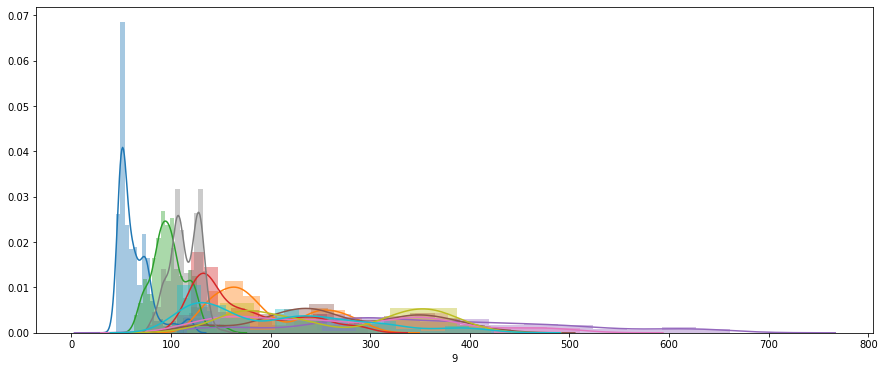

In [58]:
# Constructing a new dataframe

df = pd.DataFrame(price_list)

import seaborn as sns
plt.figure(figsize=[15,6])
for i in range(len(df.columns)):
    sns.distplot(df[i])